# Boeing Assignment 

### Applicant: Rodolfo Lerma

### Problem Statement:

Included in the training dataset is information on used cars previously sold. Each row corresponds to one used car listing. The first column of the data contains a unique identifier for the listing. The next twenty-six columns contain information on parameters relevant to the transaction, with those parameters described in more detail in the appendix attached. Finally, the last two columns of the `“Training_dataset.csv”` contain information on `“Vehicle_Trim”` and `“Dealer_Listing_Price”`, which describe the trim of the vehicle involved in the sale, and the price at which the vehicle was listed by the dealer.
Your challenge is to build one or more models, through whatever means you find most appropriate, capable of predicting **vehicle trim** and **dealer listing price** given the other twenty six variables provided.

**Instructions:**

- Model the problem using whatever means you consider best. Your work is expected to be entirely your own. You may consult any resource or reference of your choosing to aide in solving the problem, but the work must be entirely yours. Please reference any resources you use in the write-up covered in step 5.


- If you use a software package to assist you, please include ALL of your original source code in its entirety, and submit it to us EXACTLY following the instructions in Steps 5 and 6. Please also include information about which package you used and why in your brief problem write-up.


- Do not use or add data from any third-party sources, such as internet car estimating tools, to the data provided. At your discretion, some or all of the provided data in `“Training_dataset.csv”` may be used, omitted or manipulated in any way during modeling, but no additional data may be added from outside sources.


- Once your model is built, use it to make predictions on EACH of the 1,000 vehicle listings included in the `“Test_dataset.csv”` file. Your output should be a comma separated values (.csv) file with one-thousand rows and three columns. The first column should be the `unique identifier` for the listing. The second column should be your predicted value for `vehicle trim`. The third column should be your predicted value for `dealer listing price`.


- Please submit a brief write-up of no more than 500 words describing the approach you selected and why. Please save your response as a PDF if possible. Please copy any source code from Step 2 and paste it as text into an appendix at the end of your write-up.


- Return your submission to us by replying back to the original email before the date and time specified in that email. Please attach the CSV containing your predictions from Step 4 and the PDF containing your write-up and source code from step 5 to the email. It should contain ONLY two attachments: the CSV from step 4 and the PDF from Step 5. Please don’t resubmit any of our original data back in your reply.

## TO DO LIST:

**Work for MONDAY:**

- Select one final model for the regression
    - Use CrossVal to select the best hyper parameters
    - Combine training and validation for final model
    - Make a final prediction for the price.
 
- Start looking into the second model (look at Assignment 06)
    - Feature Selection
    - Hyperparameters optimization
    - Final model selection
    - Combine training and validation for final model
    - Make a prediction for the trim
    - Decode the trim based on initial categorization
    
- Save both results in an excel file

- Give format to the code:
    - Structure

## Abstract:

The analysis is structured in the following way:


### General Structure:

- **Clean the Data:**
    - Missing values: Remove or replace (for median or mode)
    - Split the columns
    - One hot encoding


- **Split into training and validation:**


- **Feature Selection:**
    - Feature selection for 2 models
    - Select the most important variables


- **Select different models and do Cross Validation to select the right hyper parameters:**
    - For 2 models for 2 predictions


- **From there select the best model and get the final model:**
    - For 2 models
  
  
- **Do a final Test Prediction:**
    - For 2 models

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Test_df = pd.read_csv('Test_Dataset.csv')
Training_df = pd.read_csv('Training_Dataset.csv')

In [2]:
Training_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0


In [3]:
Training_df.shape

(6298, 29)

It is possible to see that the Training Data Set contains 29 columns and 6298 data points. Out of those 29 columns, 2 are the **target** variables.

In [4]:
Test_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear
0,8622015,Seneca,False,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,SC,29678,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018
1,8625693,Bedford,False,Inventory Command Center,North Coast Auto Mall,4.7,2116,OH,44146,SUV,...,"1 Owner, Accident(s) Reported, Non-Personal Us...",138.770486,Jeep,42553.0,Grand Cherokee,Good Deal,This 2017 Jeep Grand Cherokee 4dr Limited 4x4 ...,Used,8-Speed Automatic,2017
2,8625750,Webster,False,Jeep Certified Program,Marina Chrysler Dodge Jeep Mitsubishi RAM,3.9,46,NY,14580,SUV,...,"1 Owner, Buyback Protection Eligible",31.951088,Jeep,48951.0,Grand Cherokee,Good Deal,Certified. Brilliant Black Crystal Pearlcoat 2...,Used,8-Speed Automatic,2015


In [5]:
Test_df.shape

(1000, 27)

It is possible to see that the Training Dataset contains 27 columns and 1000 data points, this since the 2 **target** variables were removed from the dataset.

In [6]:
Training_df.dtypes

ListingID                 int64
SellerCity               object
SellerIsPriv               bool
SellerListSrc            object
SellerName               object
SellerRating            float64
SellerRevCnt              int64
SellerState              object
SellerZip               float64
VehBodystyle             object
VehCertified               bool
VehColorExt              object
VehColorInt              object
VehDriveTrain            object
VehEngine                object
VehFeats                 object
VehFuel                  object
VehHistory               object
VehListdays             float64
VehMake                  object
VehMileage              float64
VehModel                 object
VehPriceLabel            object
VehSellerNotes           object
VehType                  object
VehTransmission          object
VehYear                   int64
Vehicle_Trim             object
Dealer_Listing_Price    float64
dtype: object

Looking at the data, the type distribution is as follows:
- 8 Numerical Variables (6 `float64` & 2 `int64`)
- 2 Boolean Variables (`bool`)
- 19 Categorical Variables (`object`)

### Distribution of the Target Variable

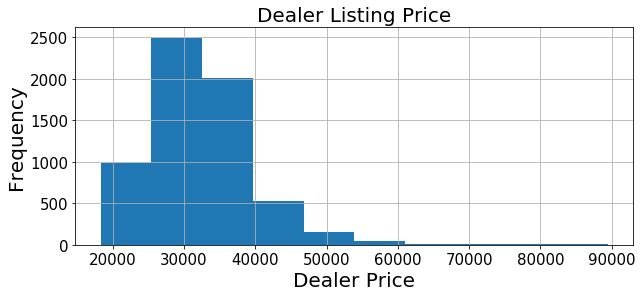

In [7]:
import matplotlib.pyplot as plt
Training_df['Dealer_Listing_Price'].hist(figsize = (10,4))
plt.xlabel('Dealer Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Dealer Listing Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

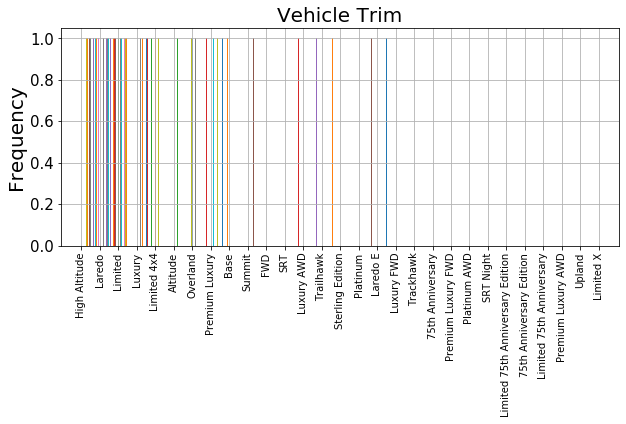

In [8]:
Training_df['Vehicle_Trim'].hist(figsize = (10,4))
#plt.xlabel('Trim', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Vehicle Trim', fontsize = 20)
plt.tick_params(axis="x", labelsize=10, rotation=90)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

###  Distribution of Numerical Variables

In [9]:
numeric_columns = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', 'VehYear']

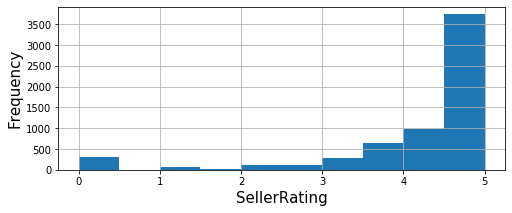

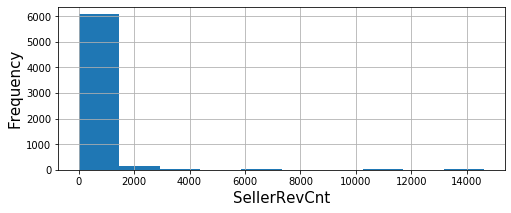

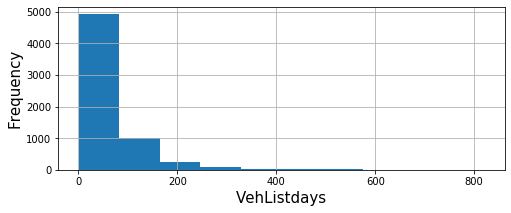

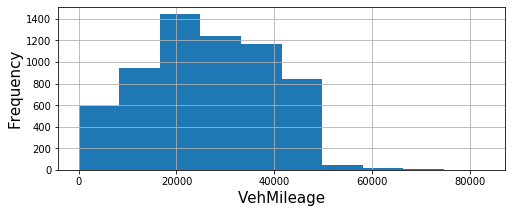

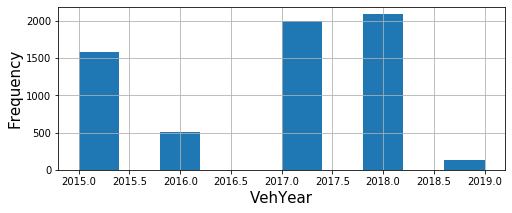

In [10]:
import matplotlib.pyplot as plt

def hist_plot(df,a):
    df[a].hist(figsize = (8,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()
    
for i in numeric_columns:
    hist_plot(Training_df, i)

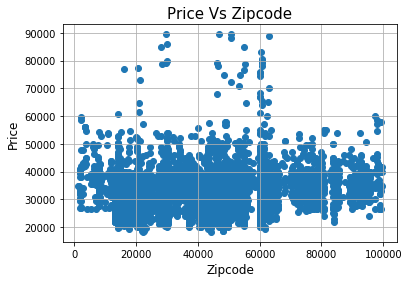

In [11]:
plt.scatter(Training_df['SellerZip'], Training_df['Dealer_Listing_Price'])
plt.title('Price Vs Zipcode', fontsize = 15)
plt.xlabel('Zipcode', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.grid()
plt.show()

It seems zipcode does not provide a clear difference in reference to the `Price` target variable.

## Data Formatting (Training Dataset & Testing Dataset)

### Missing Values

In [12]:
def missing_values(data):
    columns = data.columns.to_list()
    missing_values = []
    my_list = data.columns.values.tolist()
    y = data.shape
    for i in my_list:
        x = data[i].isnull().sum()
        missing_values.append(x)

    columns_missing = dict(zip(my_list, missing_values))
    a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

    missing_columns_names = []
    for key, value in columns_missing.items():
        if value > 0: 
            x = key
            missing_columns_names.append(x)
    return columns_missing, missing_columns_names

In [13]:
#Training Data
dic_missing, missing_columns_names = missing_values(Training_df)

#Testing Data
dic_missing_test, missing_columns_names_test = missing_values(Test_df)

In [14]:
print('Training Data')
print(dic_missing)

Training Data
{'ListingID': 0, 'SellerCity': 0, 'SellerIsPriv': 0, 'SellerListSrc': 2, 'SellerName': 0, 'SellerRating': 0, 'SellerRevCnt': 0, 'SellerState': 0, 'SellerZip': 2, 'VehBodystyle': 0, 'VehCertified': 0, 'VehColorExt': 73, 'VehColorInt': 728, 'VehDriveTrain': 401, 'VehEngine': 361, 'VehFeats': 275, 'VehFuel': 2, 'VehHistory': 201, 'VehListdays': 2, 'VehMake': 0, 'VehMileage': 2, 'VehModel': 0, 'VehPriceLabel': 285, 'VehSellerNotes': 243, 'VehType': 0, 'VehTransmission': 197, 'VehYear': 0, 'Vehicle_Trim': 405, 'Dealer_Listing_Price': 52}


In [15]:
print('Test Data')
print(dic_missing_test)

Test Data
{'ListingID': 0, 'SellerCity': 0, 'SellerIsPriv': 0, 'SellerListSrc': 0, 'SellerName': 0, 'SellerRating': 0, 'SellerRevCnt': 0, 'SellerState': 0, 'SellerZip': 0, 'VehBodystyle': 0, 'VehCertified': 0, 'VehColorExt': 7, 'VehColorInt': 108, 'VehDriveTrain': 64, 'VehEngine': 58, 'VehFeats': 37, 'VehFuel': 0, 'VehHistory': 27, 'VehListdays': 0, 'VehMake': 0, 'VehMileage': 1, 'VehModel': 0, 'VehPriceLabel': 38, 'VehSellerNotes': 41, 'VehType': 0, 'VehTransmission': 27, 'VehYear': 0}


Looking at the data we can see that there are some columns with more than 10% (`VehColorInt`) of missing data points.

In [16]:
print('Columns with missing values greater than 200 (Training): ')
print(missing_columns_names)

Columns with missing values greater than 200 (Training): 
['SellerListSrc', 'SellerZip', 'VehColorExt', 'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel', 'VehHistory', 'VehListdays', 'VehMileage', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission', 'Vehicle_Trim', 'Dealer_Listing_Price']


In [17]:
print('Columns with missing values greater than 200 (Test): ')
print(missing_columns_names_test)

Columns with missing values greater than 200 (Test): 
['VehColorExt', 'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehHistory', 'VehMileage', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission']


In [18]:
# For the training data the missing values will be removed
data = Training_df.copy()
data.dropna(inplace = True)
data.shape
data = data.reset_index()

In [19]:
# For the testing data the missing values will be filled with the mode and median
test_data = Test_df.copy()
categorical_test_missing = ['VehColorExt', 'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehHistory', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission']
numerical_test_missing = ['VehMileage']

# Replace missing values by median and mode
import statistics as st

for i in numerical_test_missing:
    test_data[i].fillna(test_data[i].median(), inplace=True)
    
for i in categorical_test_missing:
    test_data[i].fillna(st.mode(test_data[i]), inplace=True)

If the missing data is dropped we will reduce the dataset by around 15%.

### Removing Columns from dataset

Based on the nature of the data some columns will be removed as they do not add to the prediction:
- `ListingID`
- `VehSellerNotes`
- `SellerZip`

In [20]:
# For Training Dataset
data.drop(columns=['ListingID', 'VehSellerNotes', 'SellerZip', 'index'], inplace = True)
columns_updated = data.columns.to_list()

In [21]:
# For Testing Dataset
test_data.drop(columns=['VehSellerNotes', 'SellerZip'], inplace = True)
test_columns_updated = test_data.columns.to_list()

### Formatting Boolean Variables

In [22]:
boolean_columns = ['SellerIsPriv', 'VehCertified']
def boolean_format(columns, df):
    for i in columns:
        df[i] = df[i].astype(int)

In [23]:
#Training Dataset        
boolean_format(boolean_columns, data)

In [24]:
#Test Dataset        
boolean_format(boolean_columns, test_data)

### Normalizing Numerical Variables

In [25]:
def normalization_format(numeric_columns, df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(df[numeric_columns])
    data_scaled = scaler.transform(df[numeric_columns])
    df1 = pd.DataFrame(data_scaled, columns = numeric_columns)
    return df1

In [26]:
# Training Dataset
data_norm = normalization_format(numeric_columns, data)
data.drop(columns = numeric_columns, inplace = True)
data = data.join(data_norm)

In [27]:
# Test Dataset
data_norm_test = normalization_format(numeric_columns, test_data)
test_data.drop(columns = numeric_columns, inplace = True)
test_data = test_data.join(data_norm_test)

In [28]:
# Special Columns
special_columns = ['VehHistory', 'VehFeats']
targets = ["Vehicle_Trim", "Dealer_Listing_Price"]

In [29]:
# Categorical Variables:
data['Vehicle_Trim'] = data['Vehicle_Trim'].astype('category')
d = dict(enumerate(data['Vehicle_Trim'].cat.categories))
data["Vehicle_Trim_cat"] = data['Vehicle_Trim'].cat.codes
data.drop(columns = 'Vehicle_Trim', inplace = True)

In [30]:
categorical_columns = [i for i in columns_updated if i not in numeric_columns]
categorical_columns = [i for i in categorical_columns if i not in boolean_columns]
categorical_columns = [i for i in categorical_columns if i not in special_columns]
categorical_columns = [i for i in categorical_columns if i not in targets]

In [31]:
for i in categorical_columns:
    data[i] = data[i].str.lower() #Training 
    test_data[i] = test_data[i].str.lower() #Test

### One Hot Encoding For Categorical Columns

In [32]:
def hot_encoding(data, categorical_columns):
    one_hot = pd.get_dummies(data[categorical_columns])
    return one_hot

In [33]:
# Hot encoding for Training 
one_hot = hot_encoding(data, categorical_columns)
data = data.join(one_hot)
data.drop(columns = categorical_columns, inplace = True)

In [34]:
# Hot encoding for Test
one_hot_test = hot_encoding(test_data, categorical_columns)
test_data = test_data.join(one_hot_test)
test_data.drop(columns = categorical_columns, inplace = True)

### Formatting of two *List of Lists* Columns  (`VehHistory` & `VehFeats`)

There are 2 columns with a list of values that might be important for the analysis. For this reason they are going to be split and included as features (One Hot Encoding):
- `VehHistory`
- `VehFeats`

### `VehFeats`

In [35]:
def veh_features(data):
    x = pd.Series(data['VehFeats'])
    split_df = data['VehFeats'].tolist()
    mySeries = pd.Series(split_df) 
    x = mySeries[2][1:-1]
    letter_list = x.split(",")

    list_of_lists = []
    for i in range(len(mySeries)):
        x = mySeries[i][1:-1]
        new_string = x.replace(" '", "")
        new_string = new_string.replace("'", "")
        new_string = new_string.replace(",", "_")
        new_string = new_string.replace(";", "_")
        new_string = new_string.lower()
        letter_list = new_string.split("_")
        list_of_lists.append(letter_list)

    from sklearn.preprocessing import MultiLabelBinarizer
    
    test = pd.Series(list_of_lists)
    mlb = MultiLabelBinarizer()
    onehot_VehFeats = pd.DataFrame(mlb.fit_transform(test),
                       columns=mlb.classes_,
                       index=test.index)
    return onehot_VehFeats

In [36]:
# Training Dataset
onehot_VehFeats = veh_features(data)
data = data.join(onehot_VehFeats)
data.drop(columns = 'VehFeats', inplace = True)

In [37]:
# Test Dataset
onehot_VehFeats_test = veh_features(test_data)
test_data = test_data.join(onehot_VehFeats_test)
test_data.drop(columns = 'VehFeats', inplace = True)

### `VehHistory`

In [38]:
def veh_history(data):
    split_df2 = data['VehHistory'].tolist()
    mySeries2 = pd.Series(split_df2) 

    list_of_lists2 = []
    for i in range(len(mySeries2)):
        w = mySeries2[i]
        letter_list2 = w.split(",")
        list_of_lists2.append(letter_list2)
        
    from sklearn.preprocessing import MultiLabelBinarizer
    
    test2 = pd.Series(list_of_lists2)
    mlb2 = MultiLabelBinarizer()
    onehot_VehHistory = pd.DataFrame(mlb2.fit_transform(test2),
                       columns=mlb2.classes_,
                       index=test2.index)
    return onehot_VehHistory

In [39]:
# Training Dataset
onehot_VehHistory = veh_history(data)
data = data.join(onehot_VehHistory)
data.drop(columns = 'VehHistory', inplace = True)

In [40]:
# Test Dataset
onehot_VehHistory_test = veh_history(test_data)
test_data = test_data.join(onehot_VehHistory_test)
test_data.drop(columns = 'VehHistory', inplace = True)

### Splitting the dataset into Target Variables and Features (Training Dataset)

In [41]:
target_price = data['Dealer_Listing_Price']
target_trim = data['Vehicle_Trim_cat']

data.drop(columns = ['Dealer_Listing_Price', 'Vehicle_Trim_cat'], inplace = True)
columns_model = data.columns.to_list()
columns_model_test = test_data.columns.to_list()

In [42]:
list1_as_set = set(columns_model_test)
intersection = list1_as_set.intersection(columns_model)
intersection_as_list = list(intersection)

#Features for both the training and testing dataset
features = data[intersection_as_list]

**NOTE: Training Features and Test Features have to be the same**

Since this is going to help in the prediction of a test dataset that has not been seen by the model, it is important to ensure that variables used by the model are the same for both dataframes (hence the last step).

## Model 1: Prediction of `Dealer Listing Price`

### Feature Selection (LASSO) for `Dealer Listing Price` Variable

In [43]:
# LASSO
def feature_select_lasso(features, target_price, alpha_val):
    
    from sklearn import linear_model
    alpha = alpha_val # Increasing alpha can shrink more variable coefficients to 0
    clf = linear_model.Lasso(alpha=alpha)

    clf.fit(features, target_price)
    lasso_coef = clf.coef_
    wrapper_columns = features.columns.tolist()

    #Selection of the non zero coefficients from the LASSO regression
    lasso_features = []
    non_lasso_features = []
    for i in range(len(wrapper_columns)):
        w = lasso_coef[i]
        if w != 0:
            u = wrapper_columns[i]
            lasso_features.append(u)
        else:
            t = wrapper_columns[i]
            non_lasso_features.append(t)

    len_lasso = len(lasso_features)
    return lasso_features, len_lasso

In [44]:
lasso_features, len_lasso = feature_select_lasso(features, target_price, 2)
print('# of Features using LASSO: ' + str(len_lasso))

# of Features using LASSO: 356


### Model for `Dealer Listing Price` prediction

In [45]:
from sklearn.model_selection import train_test_split
lasso_variables = data[lasso_features]
X_train, X_test, y_train, y_test = train_test_split(lasso_variables, target_price, test_size=0.20, random_state=42)

#### Training

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

#Fit a linear regression model to this data
lasso = ElasticNet(alpha = 0.001, max_iter=10000)

# Fit the data(train the model)
lasso.fit(X_train, y_train)

ElasticNet(alpha=0.001, max_iter=10000)

#### Results/Predictions

In [47]:
# Predict
y_predicted_train_lasso = lasso.predict(X_train)
y_predicted_test_lasso = lasso.predict(X_test)

In [48]:
def rsquared_cal(actual, predicted, status):
    corr_matrix = np.corrcoef(actual, predicted)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print(status + ' R-Squared: {}'.format(R_sq))
    
def scatters(a,b,c,d):
    plt.figure(figsize=(10, 6)).gca()
    plt.scatter(a, b)
    plt.plot(a, c, linewidth=3, color = 'red')
    plt.grid(True)
    plt.xlabel(d)
    plt.ylabel('Price')
    plt.title('Regression using: ' + d)

Training R-Squared: 0.9166376659887748


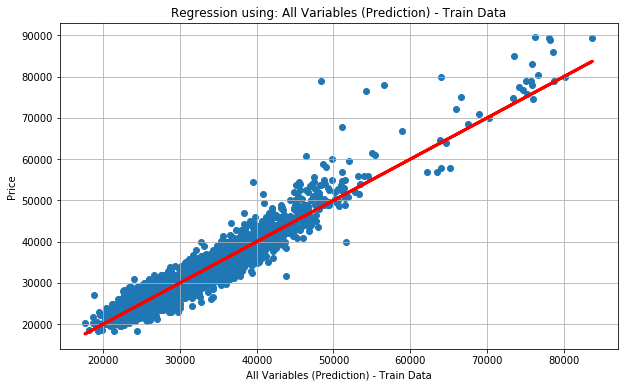

In [49]:
#Training Results
scatters(y_predicted_train_lasso, y_train, y_predicted_train_lasso, 'All Variables (Prediction) - Train Data')
rsquared_cal(y_train, y_predicted_train_lasso, 'Training')

Validation R-Squared: 0.8861000966542949


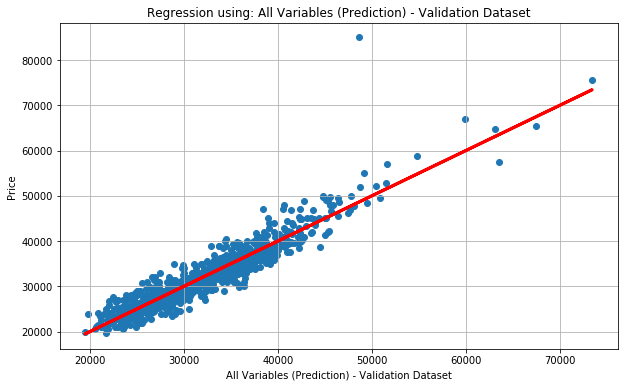

In [50]:
#Validation Results
scatters(y_predicted_test_lasso, y_test, y_predicted_test_lasso, 'All Variables (Prediction) - Validation Dataset')
rsquared_cal(y_test, y_predicted_test_lasso, 'Validation')

### Re-train the model but now with all the datapoints (training + validation)

In [51]:
#Fit a linear regression model to this data
lassofinal = ElasticNet(alpha = 0.001, max_iter=10000)

# Fit the data(train the model) lasso_variables, target_price
lassofinal.fit(lasso_variables, target_price)

ElasticNet(alpha=0.001, max_iter=10000)

#### Prediction using the `Test_data`. 

In [52]:
# Test Predictions
lasso_variables_test = test_data[lasso_features]
final_prediction_price = lassofinal.predict(lasso_variables_test)

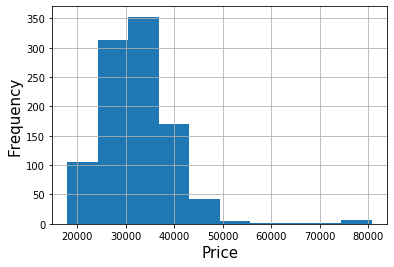

In [53]:
plt.hist(final_prediction_price)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.grid(True)
plt.show()

###  Export to dataframe

In [54]:
final_dataframe = pd.DataFrame()
final_dataframe['price_prediction'] = final_prediction_price
final_dataframe.to_csv('predictions.csv', index=False)

## Model 2: Prediction of `Vehicle_Trim`

In [55]:
lasso_features_trim, len_lasso_trim = feature_select_lasso(features, target_trim, 0.001)
print('# of Features using LASSO: ' + str(len_lasso_trim))

# of Features using LASSO: 440


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2954.9076939944425, tolerance: 14.66788055500491
  positive)


In [56]:
lasso_variables_tim = data[lasso_features_trim]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(lasso_variables_tim, target_trim, test_size=0.20, random_state=42)

### Different Models and Hyperparameters

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

#### Hyperparameter Settings for the `Decision Tree` Model

In [58]:
max_depth_options = [2,3,4,5,6,7,8,9,10]
min_sample_options = [2,3,4,5,6,7,8,9,10]
model_criterion = ['entropy', 'gini']
min_samples_leaf_options = [2,3,4,5,6,7,8,9,10]

dt_grid = {'criterion': model_criterion, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

dt_base = DecisionTreeClassifier()

decision_trees_hyper = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
decision_trees_hyper.fit(X_train_2, y_train_2)

x = decision_trees_hyper.best_params_
x

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'entropy'}

#### Hyperparameter Settings for the `Random Forest` Model

In [59]:
n_estimators_options = [10,20,30,40,50,60,70,80,90,100]

rf_grid = {'criterion': model_criterion,
           'n_estimators':n_estimators_options, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

rf_base = RandomForestClassifier()

random_forest_hyper = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
random_forest_hyper.fit(X_train_2, y_train_2)

y = random_forest_hyper.best_params_
y

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini'}

#### Hyperparameter Settings for the `Logistic Regression` Model

In [60]:
from sklearn.linear_model import LogisticRegression

max_iter_options = [1000,10000]
penalty_options = ['l1', 'l2', 'elasticnet', 'none']
solver_options = ['saga']
multi = ['multinomial']

lr_grid = {'penalty': penalty_options,
           'solver': solver_options,
           'multi_class': multi,
           'max_iter': max_iter_options}

lr_base = LogisticRegression()

logistic_reg_hyper = RandomizedSearchCV(estimator = lr_base, param_distributions = lr_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
logistic_reg_hyper.fit(X_train_2, y_train_2)

z = logistic_reg_hyper.best_params_
z

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=200. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.85852248 0.86199138        nan 0.86100079 0.85852229 0.86199138
        nan 0.85629328]
  category=UserWarning


{'solver': 'saga',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 1000}

### Comparison

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

#Classifiers
dt = DecisionTreeClassifier(criterion=x['criterion'], max_depth = x['max_depth'], min_samples_split = x['min_samples_split'], min_samples_leaf = x['min_samples_leaf'])
rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])
lr = LogisticRegression(solver = z['solver'], penalty = z['penalty'], multi_class = z['multi_class'], max_iter = z['max_iter'])

#List for Classifiers and Names
header = ["Decision_Tree","Random_Forest", "Logistic_Regression"]
V = [dt, rf, lr]

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, KFold
skf = StratifiedKFold(n_splits=10)
summary_accuracy = []
variation_accuracy = []
for i in V:
    results = cross_val_score(i, X_train_2, y_train_2, cv=skf)
    accuracy = results.mean()*100.0
    variation = results.std()*100.0
    summary_accuracy.append(accuracy)
    variation_accuracy.append(variation)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


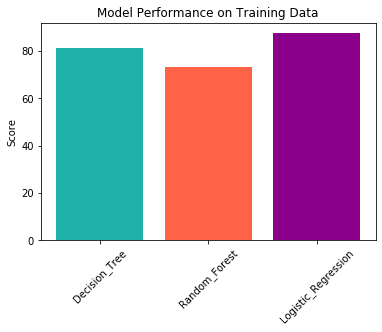

In [63]:
colors = ['lightseagreen', 'tomato', 'darkmagenta']
plt.bar(header, summary_accuracy, color=colors)
plt.xticks(rotation=45)
plt.title('Model Performance on Training Data')
plt.ylabel("Score")
plt.show()

In [64]:
print(summary_accuracy)

[81.39289487261381, 73.38900081075104, 87.53783504901358]


In [65]:
variation_accuracy 

[1.9076156789666385, 1.6375320859223483, 1.5569232995664988]

In [66]:
summary_accuracy_validation = []
for i in V:
    i.fit(X_train_2, y_train_2)
    prediction_val = i.predict(X_test_2)
    AR = accuracy_score(y_test_2, prediction_val)
    summary_accuracy_validation.append(AR)

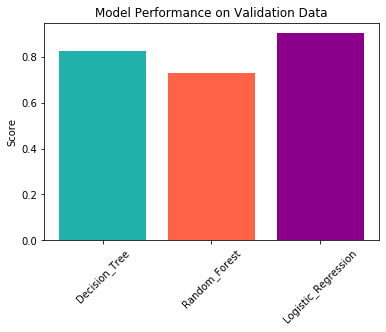

In [67]:
colors = ['lightseagreen', 'tomato', 'darkmagenta']
plt.bar(header, summary_accuracy_validation, color=colors)
plt.xticks(rotation=45)
plt.title('Model Performance on Validation Data')
plt.ylabel("Score")
plt.show()

### Final Model 2 Selection and Training (using `training` + `validation` data)

In [68]:
# rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])
# rf.fit(X_train_2, y_train_2)

In [69]:
lr = LogisticRegression(solver = z['solver'], penalty = z['penalty'], multi_class = z['multi_class'], max_iter = z['max_iter'])
lr.fit(lasso_variables_tim, target_trim)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [70]:
ListingID_column = test_data['ListingID']
test_data.drop(columns=['ListingID'], inplace = True)

In [71]:
# Test Predictions
lasso_variables_test_trim = test_data[lasso_features_trim]
final_prediction_trim = lr.predict(lasso_variables_test_trim)

In [72]:
d

{0: '75th Anniversary',
 1: '75th Anniversary Edition',
 2: 'Altitude',
 3: 'Base',
 4: 'FWD',
 5: 'High Altitude',
 6: 'Laredo',
 7: 'Laredo E',
 8: 'Limited',
 9: 'Limited 75th Anniversary Edition',
 10: 'Luxury',
 11: 'Luxury AWD',
 12: 'Luxury FWD',
 13: 'Overland',
 14: 'Platinum',
 15: 'Platinum AWD',
 16: 'Premium Luxury',
 17: 'Premium Luxury AWD',
 18: 'Premium Luxury FWD',
 19: 'SRT',
 20: 'SRT Night',
 21: 'Sterling Edition',
 22: 'Summit',
 23: 'Trackhawk',
 24: 'Trailhawk',
 25: 'Upland'}

In [74]:
# dict = {"Spark" : 'S', "PySpark" : 'P', "Hadoop": 'H', "Python" : 'P', "Pandas": 'P'}
# df2=df.replace({"Courses": dict})
# print(df2)

In [73]:
# Training_df['Vehicle_Trim'].hist(figsize = (10,4))
# #plt.xlabel('Trim', fontsize = 20)
# plt.ylabel('Frequency',fontsize = 20)
# plt.title('Vehicle Trim', fontsize = 20)
# plt.tick_params(axis="x", labelsize=10, rotation=90)
# plt.tick_params(axis="y", labelsize=15)
# plt.grid(True)
# plt.show()